# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [32]:
df_raw = pd.read_csv("./assets/admissions.csv")
df = df_raw.dropna()
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [34]:
df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123ff1cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1243b3e90>]], dtype=object)

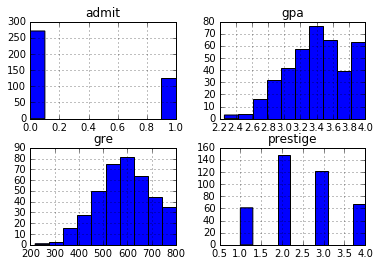

In [33]:
#df.hist()
df.hist()

In [35]:
df_no_admit = df[ df.admit == 0 ]

In [43]:
rows_df_no_admit, cols_df_no_admit = df_no_admit.shape
print(rows_df_no_admit)

271


In [55]:
gpa_group = df_no_admit.groupby(["gpa"]).apply( lambda x: len(x) )

In [56]:
gpa_group.head(2)

gpa
2.26    1
2.42    1
dtype: int64

In [57]:
type(gpa_group)

pandas.core.series.Series

In [68]:
gpa_by_freq = gpa_group.apply(lambda x: (float(x)/rows_df_no_admit)*100)

In [71]:
gpa_by_freq

count    120.000000
mean       0.833333
std        0.673981
min        0.369004
25%        0.369004
50%        0.738007
75%        1.107011
max        5.535055
dtype: float64

In [ ]:
df["gpa_ratio"] = df_no_admit.gpa.apply(lambda x:)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1246ef6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124a40fd0>]], dtype=object)

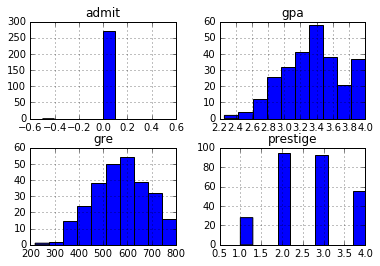

In [36]:
df_no_admit.hist()

In [37]:
df_admit = df[ df.admit == 1 ]

In [41]:
rows,cols = df_admit.shape
print(rows)

126


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124b73790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124fd2490>]], dtype=object)

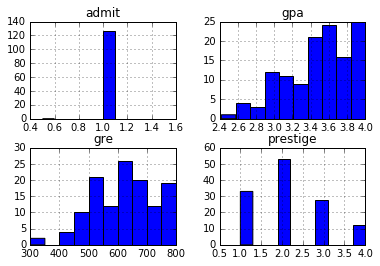

In [38]:
df_admit.hist()

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [79]:
df_dummies = pd.get_dummies(df['prestige'])

In [83]:
df_dummies.dtypes

1    float64
2    float64
3    float64
4    float64
dtype: object

In [86]:
final_df = df.join(df_dummies[[1.0,2.0,3.0]])

In [89]:
final_df.head()

,admit,gre,gpa,prestige,1.0,2.0,3.0
0,0,380,3.61,3,0,0,1
1,1,660,3.67,3,0,0,1
2,1,800,4.00,1,1,0,0
3,1,640,3.19,4,0,0,0
4,0,520,2.93,4,0,0,0


In [94]:
final_df2 = final_df.drop('prestige', 1)
final_df2.head(5)

,admit,gre,gpa,1.0,2.0,3.0
0,0,380,3.61,0,0,1
1,1,660,3.67,0,0,1
2,1,800,4.00,1,0,0
3,1,640,3.19,0,0,0
4,0,520,2.93,0,0,0


#### 2.2 When modeling our class variables, how many do we need? 
df_dummies.dtypes


Answer: 6

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [ ]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted



#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [102]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(final_df2[['gre', 'gpa', 1, 2, 3,]], final_df2['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [105]:
print lm.coef_
print lm.intercept_
print final_df2.admit.mean()

[[  1.58889206e-03   1.84630696e-04   1.16761197e+00   5.26947989e-01
   -3.80822681e-02]]
[-2.07018745]
0.317380352645


#### 3.3 Calculate the odds ratio

In [107]:
feature_set = final_df2[['gre', 'gpa', 1, 2, 3,]]
print lm.score(feature_set, final_df2['admit'])

0.700251889169


#### 3.4 Write this finding in a sentenance: 

Answer: 

#### 3.5 Print the cross tab for prestige_4

In [122]:
df_dummies_4 = pd.get_dummies(df['prestige'])
final_df_4 = df.join(df_dummies[[2.0,3.0,4.0]])

pd.crosstab(final_df_4['admit'], final_df_4[4])

4.0,0.0,1.0
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [ ]:
# OR = 12:55 
# Probability of admission after attending a Prestige 4 school: 12/67 = 17.9%
# OR .179/1-.179  .179/.821 =  0.218

#### 3.7 Write this finding in a sentence

Answer: for every 1 person that was denied admission, .218 people were admitted

## Part 4. Analysis

In [110]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(final_df2.ix[:, 'prestige_2':])
print data.head()

KeyError: 'prestige_2'

We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [ ]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

#### 4.2 Fit the model

#### 4.3 Print the summary results

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

#### 4.5 Interpret the OR of Prestige_2

Answer: 

#### 4.6 Interpret the OR of GPA

Answer: 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [ ]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [ ]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

#### 5.1 Recreate the dummy variables

In [ ]:
# recreate the dummy variables

# keep only what we need for making predictions


#### 5.2 Make predictions on the enumerated dataset

#### 5.3 Interpret findings for the last 4 observations

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.